In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math ,datetime
from sklearn import preprocessing, model_selection , svm
from sklearn.linear_model import LinearRegression
!pip install quandl
import quandl

import matplotlib.pyplot as plt
from matplotlib import style  
style.use('ggplot')

0.978297089689695
[1102.53698177 1071.92047266 1019.30835547 1060.65829296 1072.40239473
 1072.73894536 1091.53821891 1110.47989726 1113.86312694 1122.12404685
 1131.53442183 1128.46070329 1147.85112106 1163.50138857 1135.10735534
 1121.44830753 1087.35917797 1102.84880869 1113.74558047 1120.23638077
 1134.51029008 1148.94844842 1180.53139496 1184.87414472 1156.91328316
 1167.81632875 1169.64841453 1152.24562707 1117.6337201  1114.1200897
 1112.20528903 1069.30941572 1042.08626448 1072.16658145 1020.78393058] 0.978297089689695


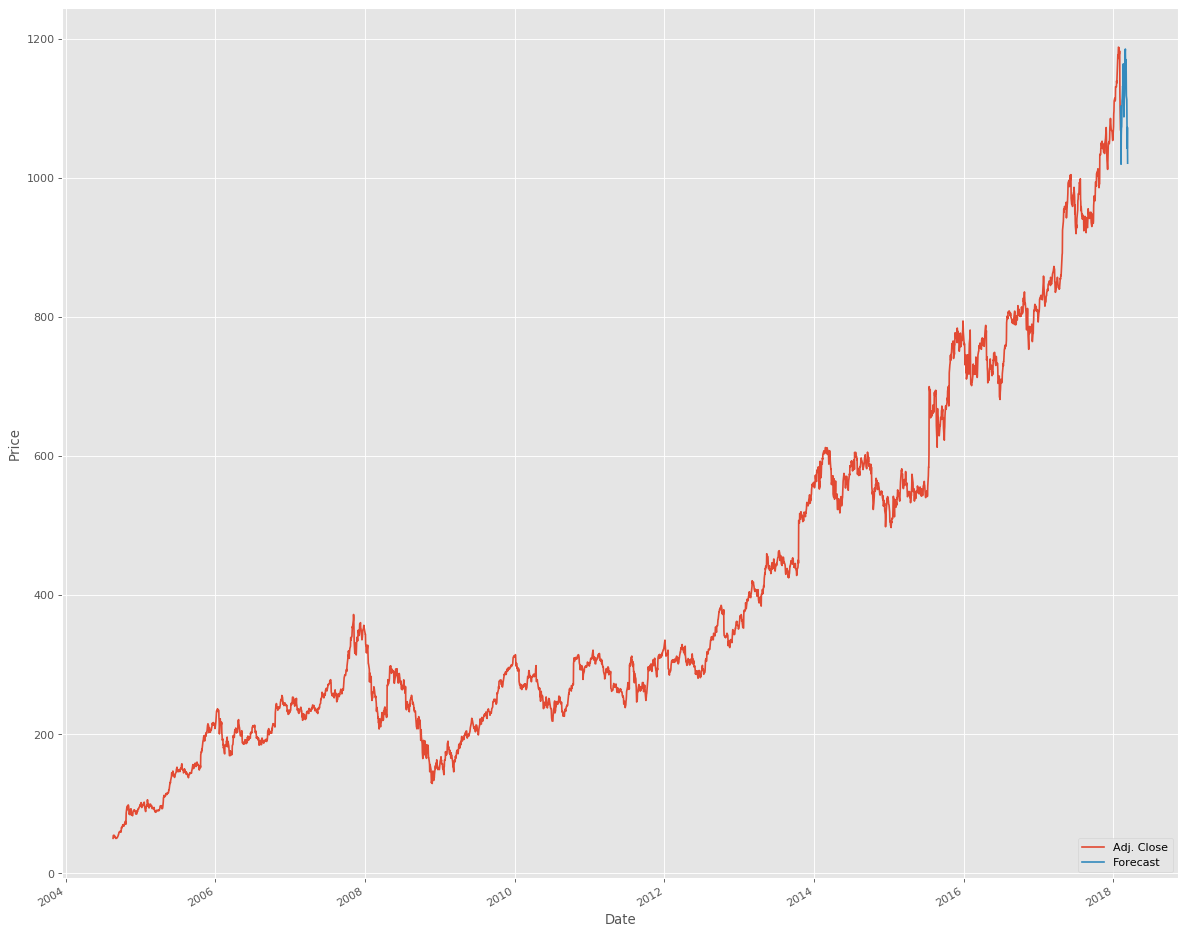

In [2]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

#

x = np.array(df.drop(['label'],1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

x_train, x_test, y_train, y_test = model_selection.train_test_split (x , y, test_size=0.2)
clf = LinearRegression(n_jobs=-1) #multithreading 
clf.fit(x_train, y_train)
accuracy = clf.score(x_test,y_test)   
forecast_set = clf.predict(x_lately)

print(accuracy)
print(forecast_set, accuracy)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

    
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')  
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [3]:
clf = svm.SVR()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test,y_test)   
print(accuracy)

0.7844308801887185


In [4]:
clf = svm.SVR(kernel='linear')
clf.fit(x_train, y_train)
accuracy = clf.score(x_test,y_test)   
print(accuracy)

0.9764790833175275


In [5]:
clf = svm.SVR(kernel='poly')
clf.fit(x_train, y_train)
x_plot= clf.predict(x_test)
accuracy = clf.score(x_test,y_test)   
print(accuracy)

0.5617718217343308


## OK now to try some stuff on my own.... 

### Holt linear


In [6]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pandas import Series


C:\Users\t954349\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


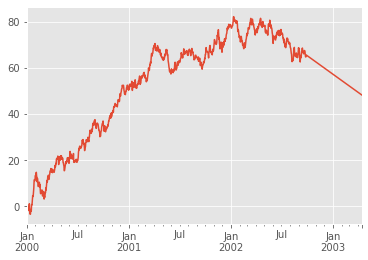

In [7]:
temp = np.random.randn(1000)
ts = Series(temp, index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

fit1 = Holt(ts).fit(smoothing_level = 0.3,smoothing_slope = 0.1)#smoothing_level = 0.3,smoothing_slope = 0.1
#forecast = fit1.forecast(200)
predict= fit1.predict(start=1001,end=1200)

#print((predict))

np_ar1 = np.array(ts)
np_ar2 = np.array(predict)
df1 = pd.DataFrame({'ar1':np_ar1})
df2 = pd.DataFrame({'ar2':np_ar2})
qq = pd.concat([df1.ar1, df2.ar2], axis=0)
#temp = np.concatenate(temp,qqq, axis=None)

#print(np_ar2)

ts = Series(np.asarray(qq), index=pd.date_range('1/1/2000', periods=1200))
#print(ts)

ts.plot()

### holtwinters ExponentialSmoothing

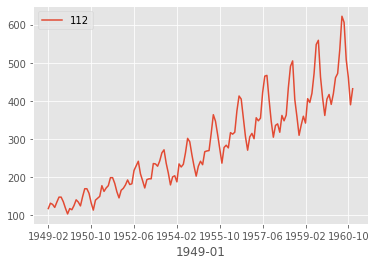

In [8]:
# https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line
# https://stackoverflow.com/questions/50785479/holt-winters-time-series-forecasting-with-statsmodels


from statsmodels.tsa.holtwinters import ExponentialSmoothing


URL = "https://raw.githubusercontent.com/BhavyaGulati/TimeSeries-FlightPassesngerPrediction/master/international-airline-passengers.csv"
df = pd.read_csv(URL, 
#                  parse_dates=0, 
                 index_col=0)
df.plot.line()

# df.index = pd.to_datetime(df.index, format="%G-%w") # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

[382.15206249990683, 402.2137188827233, 377.79223486268296, 441.1440981603422, 425.7001402278618, 445.68263770374386, 507.2157353207251, 583.79528470429, 588.2452837739964, 478.31919015791874, 415.3312113003262, 350.1019090134937, 382.15206249990683]


C:\Users\t954349\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\t954349\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\t954349\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


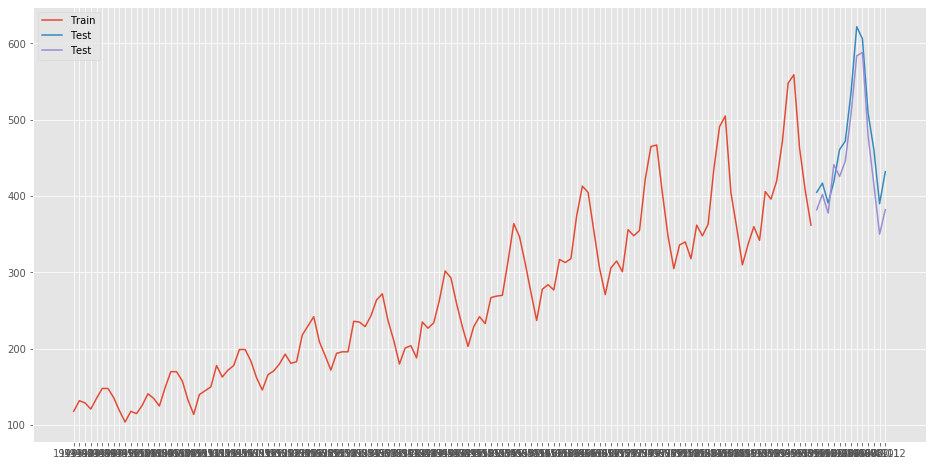

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


train, test = df.iloc[:130, 0], df.iloc[130:, 0]
test = test.drop(test.index[len(test)-1])



train.index.freq = 'MS'
test.index.freq = 'MS'


#train.index = pd.DatetimeIndex(train.index.values,                               freq='MS')
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

pred.index.freq = 'MS'


list = []
for i in range(len(pred)):
    list.append(pred[i])
    
    
    
print(list)

plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred, label='Test')
#plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')



### ARIMA

ref: [1, for prams](https://stackoverflow.com/questions/44235558/statespace-sarimax-model-why-the-model-use-all-the-data-to-train-mode-and-pred)

[2, docs](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.fit.html#statsmodels.tsa.statespace.sarimax.SARIMAX.fit)

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
# # https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

C:\Users\t954349\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\t954349\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


mean_squared_error:  251.52870849618478


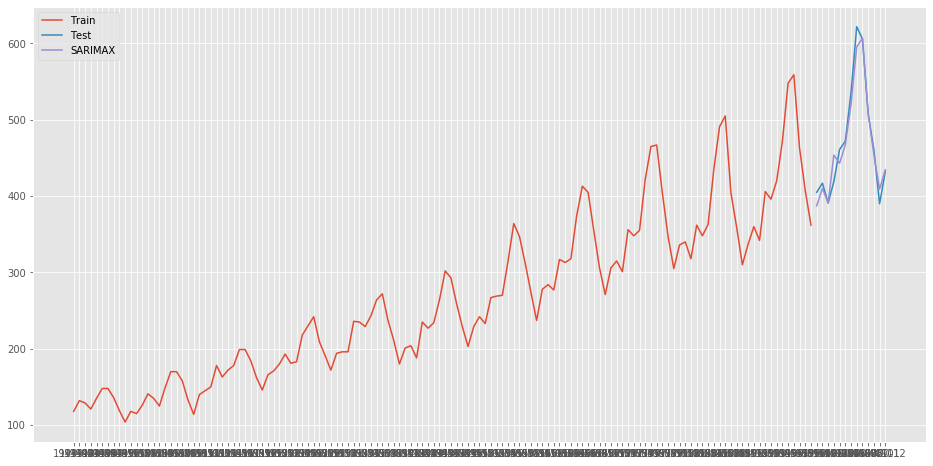

In [11]:
y_hat_avg = [0]

train, test = df.iloc[:130, 0], df.iloc[130:, 0]
test = test.drop(test.index[len(test)-1])

train.index.freq = 'MS'
test.index.freq = 'MS'
pred.index.freq = 'MS'


model = SARIMAX(train,order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit() #order=(2, 1, 4),seasonal_order=(0,1,1,7)

pred = model.predict(start=test.index[0], end=test.index[-1])#dynamic=True

list = [pred[i] for i in range(len(pred))]
#print(list)


plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, list, label='SARIMAX')
plt.legend(loc='best')

error = mean_squared_error(test, pred)
print("mean_squared_error: ",error)

In [12]:
#plt.figure(figsize=(16,8))
#plt.plot(ts, label="ts")
#plt.plot(np_ar2, label="holt")
#plt.legend(loc='best')
#plt.show()